เชื่อม google colab ก่อนทุกครั้ง

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


ทำการเเสดงว่าเเต่ละหมวดหมู่มีคำเเนะนำทั้งหมดเท่าไหร่เเล้วยกตัวอย่างคำเเนะนำมา 5-10 คำเเนะนำ

In [ ]:
import json
import random
import pandas as pd

# 📂 โหลดไฟล์ JSON ที่จัดหมวดหมู่แล้ว
input_file_path = '/content/drive/MyDrive/LockLearn/recommendations_with_categories.json'

with open(input_file_path, 'r', encoding='utf-8') as f:
    categorized_data = json.load(f)

# 📊 สร้าง DataFrame จากข้อมูล JSON
df = pd.DataFrame(categorized_data)

# ✅ ตรวจสอบว่า DataFrame ถูกต้อง
print(f'📊 จำนวนคำแนะนำทั้งหมด: {len(df)}')

# 🔍 จัดกลุ่มคำแนะนำตามหมวดหมู่
grouped = df.groupby('category')

# 🔍 แสดงคำแนะนำ 5-10 ข้อจากแต่ละหมวดหมู่
for category, group in grouped:
    print(f"\n🔹 หมวดหมู่: {category} ({len(group)} คำแนะนำ)")
    sample_recs = group.sample(n=min(len(group), 10), random_state=42)
    for rec in sample_recs['text']:
        print(f"- {rec}")

📊 จำนวนคำแนะนำทั้งหมด: 7414

🔹 หมวดหมู่: Business (4 คำแนะนำ)
- In business, focus on the actual quality and value of a product, rather than its reputation or branding.
- To prosper, a company must add value to its customers by increasing the quality of their lives through its products or services.
- Understanding and addressing the pain points and discomforts of customers can help businesses to differentiate themselves and gain a competitive edge.
- Prioritize quality as the top priority in business and management.

🔹 หมวดหมู่: Business/Career Development (1 คำแนะนำ)
- To achieve long-term success, a company must continually add value to people's lives.

🔹 หมวดหมู่: Career Development (139 คำแนะนำ)
- When working, demonstrate commitment and be willing to go the extra mile.
- Model successful behaviors and strategies from others to achieve your goals.
- Constantly reinforce the pleasure and positive impact of an alternative solution in a negotiation.
- Don't drop out of school, as you 

เราจะเเยกหมวดหมู่ที่เจอบ่อยกับเจอไม่บ่อย   โดยหมวดหมู่ทีมีคำเเนะนำน้อยกว่าๅ 80 จะถูกรวมไปยัง others

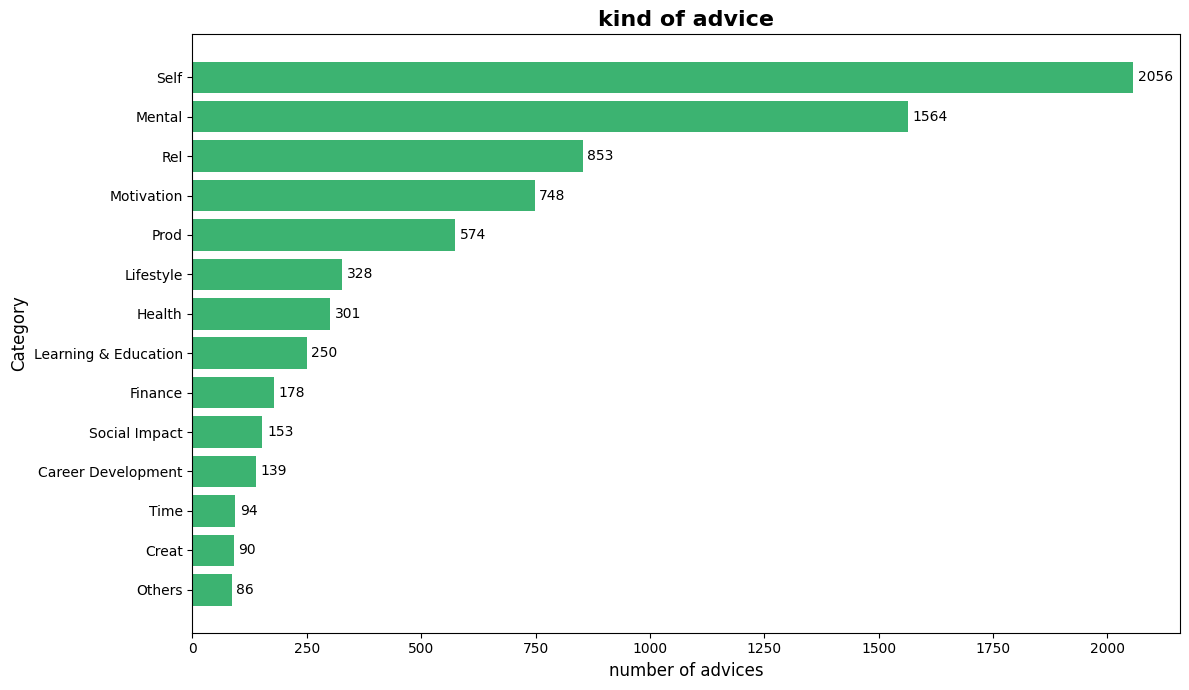

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# ฟังก์ชันโหลดข้อมูล
def read_recommendations(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

# นับคำแนะนำแต่ละประเภท
def count_recommendations_by_category(recommendations):
    return Counter([rec['category'] for rec in recommendations])

# ย่อชื่อและรวม Others
def simplify_and_merge_categories(category_counts, min_count=80):
    name_map = {
        'Self-improvement': 'Self',
        'Mental Health': 'Mental',
        'Relationships': 'Rel',
        'Career': 'Career',
        'Finance': 'Finance',
        'Productivity': 'Prod',
        'Health': 'Health',
        'Education': 'Edu',
        'Mindfulness': 'Mind',
        'Leadership': 'Lead',
        'Creativity': 'Creat',
        'Parenting': 'Parent',
        'Spirituality': 'Spirit',
        'Goal Setting': 'Goal',
        'Time Management': 'Time',
    }

    simplified = Counter()
    for full_name, count in category_counts.items():
        short = name_map.get(full_name, full_name)
        if count < min_count:
            simplified['Others'] += count
        else:
            simplified[short] += count
    return simplified

# สร้างกราฟแท่งแนวนอน
def plot_category_counts_barh(category_counts):
    sorted_items = category_counts.most_common()
    categories, counts = zip(*sorted_items)

    plt.figure(figsize=(12, 7))
    bars = plt.barh(categories, counts, color='mediumseagreen')
    plt.xlabel('number of advices', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.title('kind of advice', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 10, bar.get_y() + bar.get_height()/2, str(width), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# 🚀 Main
file_path = '/content/drive/MyDrive/LockLearn/recommendations_with_categories.json'
recs = read_recommendations(file_path)
category_counts = count_recommendations_by_category(recs)
simplified_counts = simplify_and_merge_categories(category_counts, min_count=80)
plot_category_counts_barh(simplified_counts)


ดูว่าในหวมดหมู่ others มีอะไรบ้างเเละมีอย่างละเท่าไหร่

In [ ]:
# แยกหมวดหมู่ที่ถูกจัดเข้า Others
def extract_others_details(category_counts, min_count=80):
    others = {cat: count for cat, count in category_counts.items() if count < min_count}
    sorted_others = dict(sorted(others.items(), key=lambda item: item[1], reverse=True))
    return sorted_others

# 🚀 เรียกใช้งาน
others_details = extract_others_details(category_counts, min_count=80)

# แสดงผลลัพธ์
print("🔍 รายละเอียดของหมวดหมู่ที่ถูกจัดอยู่ใน Others:")
for cat, count in others_details.items():
    print(f"- {cat}: {count} รายการ")


🔍 รายละเอียดของหมวดหมู่ที่ถูกจัดอยู่ใน Others:
- Communication: 10 รายการ
- Marketing: 9 รายการ
- Communication/Relationships: 8 รายการ
- Critical Thinking: 5 รายการ
- Rehabilitation and Reintegration: 5 รายการ
- Business: 4 รายการ
- Marketing/Strategy: 3 รายการ
- Leadership/Career Development: 3 รายการ
- Environmental Conservation: 3 รายการ
- Education: 3 รายการ
- Integrity/Lifestyle: 2 รายการ
- Problem Solving: 2 รายการ
- Education & Learning: 2 รายการ
- Decision Making / Productivity: 1 รายการ
- Marketing/Advertising (not explicitly listed, but closest is Finance or Career Development, however given the context I chose Finance): 1 รายการ
- Ethics: 1 รายการ
- Self-awareness: 1 รายการ
- Mindfulness or Time Management: 1 รายการ
- Time Management/Self-control: 1 รายการ
- Well-being: 1 รายการ
- Critical Thinking/Self-improvement: 1 รายการ
- Problem-solving/Productivity: 1 รายการ
- Goal Setting/Motivation: 1 รายการ
- Goal Setting/Productivity: 1 รายการ
- Mindfulness/Self-awareness: 1 รายก

ทำการ plot others ออกมา

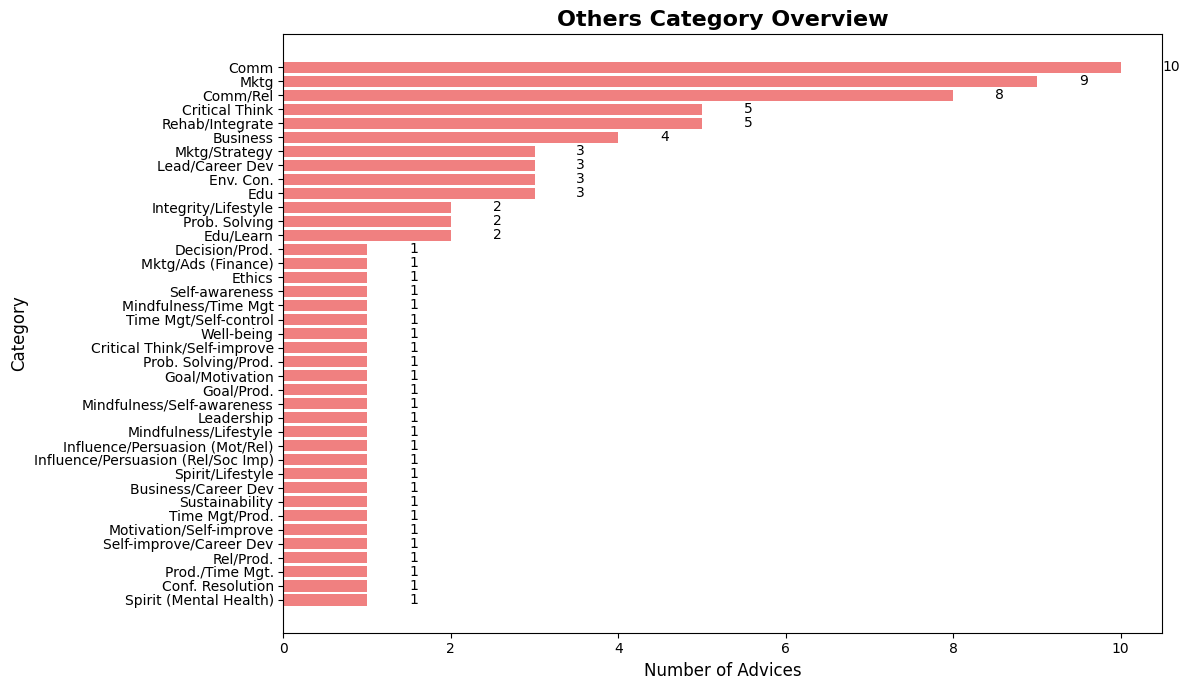

In [ ]:
def simplify_others_names(others_details):
    name_map = {
        'Communication': 'Comm',
        'Marketing': 'Mktg',
        'Communication/Relationships': 'Comm/Rel',
        'Critical Thinking': 'Critical Think',
        'Rehabilitation and Reintegration': 'Rehab/Integrate',
        'Business': 'Business',
        'Marketing/Strategy': 'Mktg/Strategy',
        'Leadership/Career Development': 'Lead/Career Dev',
        'Environmental Conservation': 'Env. Con.',
        'Education': 'Edu',
        'Integrity/Lifestyle': 'Integrity/Lifestyle',
        'Problem Solving': 'Prob. Solving',
        'Education & Learning': 'Edu/Learn',
        'Decision Making / Productivity': 'Decision/Prod.',
        'Marketing/Advertising (not explicitly listed, but closest is Finance or Career Development, however given the context I chose Finance)': 'Mktg/Ads (Finance)',
        'Ethics': 'Ethics',
        'Self-awareness': 'Self-awareness',
        'Mindfulness or Time Management': 'Mindfulness/Time Mgt',
        'Time Management/Self-control': 'Time Mgt/Self-control',
        'Well-being': 'Well-being',
        'Critical Thinking/Self-improvement': 'Critical Think/Self-improve',
        'Problem-solving/Productivity': 'Prob. Solving/Prod.',
        'Goal Setting/Motivation': 'Goal/Motivation',
        'Goal Setting/Productivity': 'Goal/Prod.',
        'Mindfulness/Self-awareness': 'Mindfulness/Self-awareness',
        'Leadership': 'Leadership',
        'Decision Making/Productivity': 'Decision/Prod.',
        'Mindfulness/Lifestyle': 'Mindfulness/Lifestyle',
        'Influence & Persuasion ( could be Motivation or Relationships)': 'Influence/Persuasion (Mot/Rel)',
        'Influence & Persuasion ( could be Relationships or Manipulation, mapping to Social Impact or Relationships)': 'Influence/Persuasion (Rel/Soc Imp)',
        'Spirituality/Lifestyle': 'Spirit/Lifestyle',
        'Business/Career Development': 'Business/Career Dev',
        'Sustainability': 'Sustainability',
        'Time Management/Productivity': 'Time Mgt/Prod.',
        'Motivation/Self-improvement': 'Motivation/Self-improve',
        'Self-improvement/Career Development': 'Self-improve/Career Dev',
        'Relationships/Productivity': 'Rel/Prod.',
        'Productivity/Time Management': 'Prod./Time Mgt.',
        'Conflict Resolution': 'Conf. Resolution',
        'Spirituality is not listed, but closest is Mental Health': 'Spirit (Mental Health)',
    }

    simplified = {name_map.get(cat, cat): count for cat, count in others_details.items()}
    return simplified

# ย่อชื่อหมวดหมู่ใน Others
simplified_others_details = simplify_others_names(others_details)

# พลอตกราฟหลังจากย่อชื่อ
def plot_others_details(simplified_others_details):
    # แยกชื่อหมวดหมู่และจำนวนคำแนะนำ
    categories, counts = zip(*simplified_others_details.items())

    # พลอตกราฟแท่งแนวนอน
    plt.figure(figsize=(12, 7))
    bars = plt.barh(categories, counts, color='lightcoral')
    plt.xlabel('Number of Advices', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.title('Others Category Overview', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()

    # แสดงจำนวนคำแนะนำในแต่ละแท่ง
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(width), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# พลอตกราฟหมวดหมู่ที่ถูกจัดใน Others หลังจากย่อชื่อ
plot_others_details(simplified_others_details)
